<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/citarum_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CitarumWater.csv to CitarumWater.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score


In [3]:
dataset = pd.read_csv('CitarumWater.csv')
print(dataset.head())

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


In [4]:
#
columns_to_drop = ["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2", "Class"]
X = dataset.drop(columns=columns_to_drop)  # Features
y = dataset["Class"]   # Target

#balancing imbalanced data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)


In [5]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training regresion model
model = LogisticRegression().fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)



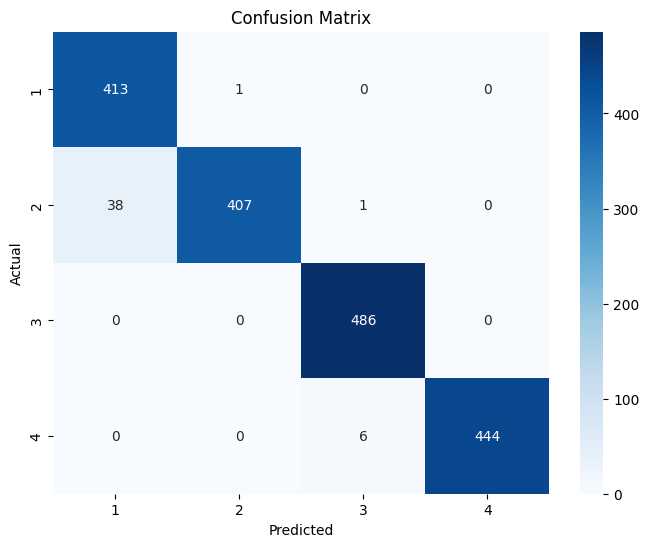

In [8]:
# Evaluation model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [10]:
#classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('F1 Squared : ',f1)
print('AUC : ',auc)
print('Recall : ',recall)

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.95       414
           2       1.00      0.91      0.95       446
           3       0.99      1.00      0.99       486
           4       1.00      0.99      0.99       450

    accuracy                           0.97      1796
   macro avg       0.97      0.97      0.97      1796
weighted avg       0.98      0.97      0.97      1796

Accuracy :  0.9743875278396437
Precision :  0.9761268211890535
F1 Squared :  0.9743591679353716
AUC :  0.9977003677050651
Recall :  0.9743875278396437


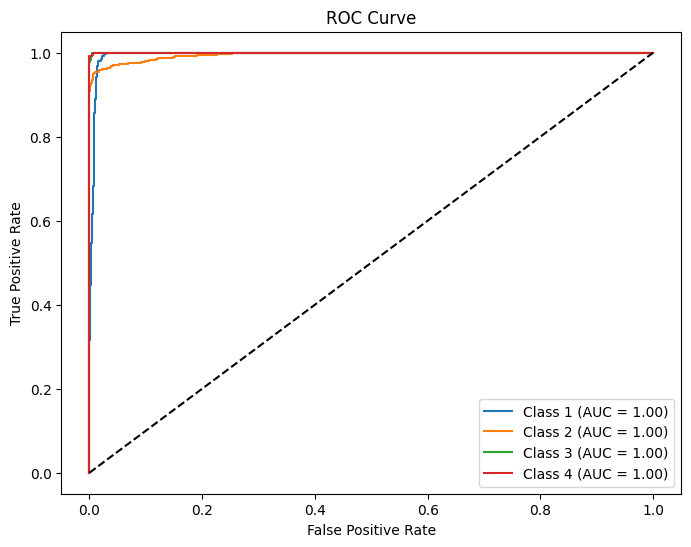

In [11]:
#plot roc curve
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in np.unique(y):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i-1])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_prob[:, i-1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## **📌 Penjelasan Persamaan Matematika dalam Evaluasi Model**

Dalam evaluasi model *machine learning*, beberapa metrik digunakan untuk menilai performa model. Berikut adalah penjelasan masing-masing metrik dan persamaan matematikanya:

---

### **1. Akurasi (Accuracy)**
Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan keseluruhan data.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- **TP** (*True Positive*): Prediksi positif yang benar  
- **TN** (*True Negative*): Prediksi negatif yang benar  
- **FP** (*False Positive*): Prediksi positif yang salah (*kesalahan tipe I*)  
- **FN** (*False Negative*): Prediksi negatif yang salah (*kesalahan tipe II*)  

> **Interpretasi:** Semakin tinggi akurasi, semakin baik model dalam mengklasifikasikan data secara keseluruhan.

---

### **2. Presisi (Precision)**
Presisi mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan seluruh prediksi positif.

$$\text{Precision} = \frac{TP}{TP + FP}$$

> **Interpretasi:**  
- Nilai presisi tinggi menunjukkan bahwa model jarang memberikan prediksi positif yang salah (*false positive*).  
- Cocok untuk kasus di mana kesalahan *false positive* harus diminimalkan (misalnya, diagnosis penyakit serius).

---

### **3. Recall (Sensitivity / True Positive Rate)**
Recall mengukur seberapa banyak kasus positif yang benar-benar terdeteksi.

$$\text{Recall} = \frac{TP}{TP + FN}$$

> **Interpretasi:**  
- Nilai recall tinggi berarti model mampu menangkap banyak kasus positif.  
- Cocok untuk kasus di mana kesalahan *false negative* harus diminimalkan (misalnya, pendeteksian kanker dalam tes medis).

---

### **4. F1 Score**
F1 Score adalah rata-rata harmonik dari *Precision* dan *Recall*. Digunakan untuk menyeimbangkan keduanya, terutama jika dataset tidak seimbang.

$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

> **Interpretasi:**  
- Nilai **F1 Score** tinggi berarti model memiliki keseimbangan antara presisi dan recall.  
- Berguna dalam kasus di mana dataset memiliki distribusi kelas yang tidak seimbang.

---

### **5. Area Under Curve (AUC) & Receiver Operating Characteristic (ROC)**
AUC adalah ukuran seberapa baik model dapat membedakan antara kelas positif dan negatif.  
ROC Curve adalah grafik yang menunjukkan hubungan antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**.

**Persamaan untuk False Positive Rate (FPR):**
$$\text{FPR} = \frac{FP}{FP + TN}$$

**Persamaan untuk True Positive Rate (TPR):**
$$\text{TPR} = \frac{TP}{TP + FN}$$

> **Interpretasi:**  
- Jika **AUC = 1**, model sempurna dalam membedakan kelas positif dan negatif.  
- Jika **AUC = 0.5**, model tidak lebih baik dari tebakan acak.  
- Jika **AUC < 0.5**, model lebih buruk dari tebakan acak (perlu diperbaiki).  
